### Comparative plot for Vision Zero Code ###
by Richard Sowers

* <r-sowers@illinois.edu>

<https://publish.illinois.edu/r-sowers/>

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

imports

In [2]:
%matplotlib inline
from matplotlib import pylab as plotter
import pandas
import numpy
import importlib
import MAIN_makeplots as makeplots
import pickle
import MAIN_config_hour_of_day_total as config
#import MAIN_config_season as config

External files

In [11]:
dir_names=config.dirnames
curvefigfile="curve_compare_production.png"
scatterfigfile="scatter_compare_production.png"

In [4]:
TradeoffDict={}
for d,dirname in enumerate(dir_names):
    dataName=dirname+"/data.p"
    windowname=config.windower(d).name
    #dataName=dirname+"/data.p"
    data=pickle.load(open(dataName,"rb"))
    TradeoffDict[windowname]=makeplots.tradeoff(data)

Manhattan whole day


/anaconda3/envs/VZ/lib/python3.6/site-packages/pandas/core/indexes/base.py:162: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


Manhattan evening and morning
Manhattan morning rush hour
Manhattan midday
Manhattan evening rush hour


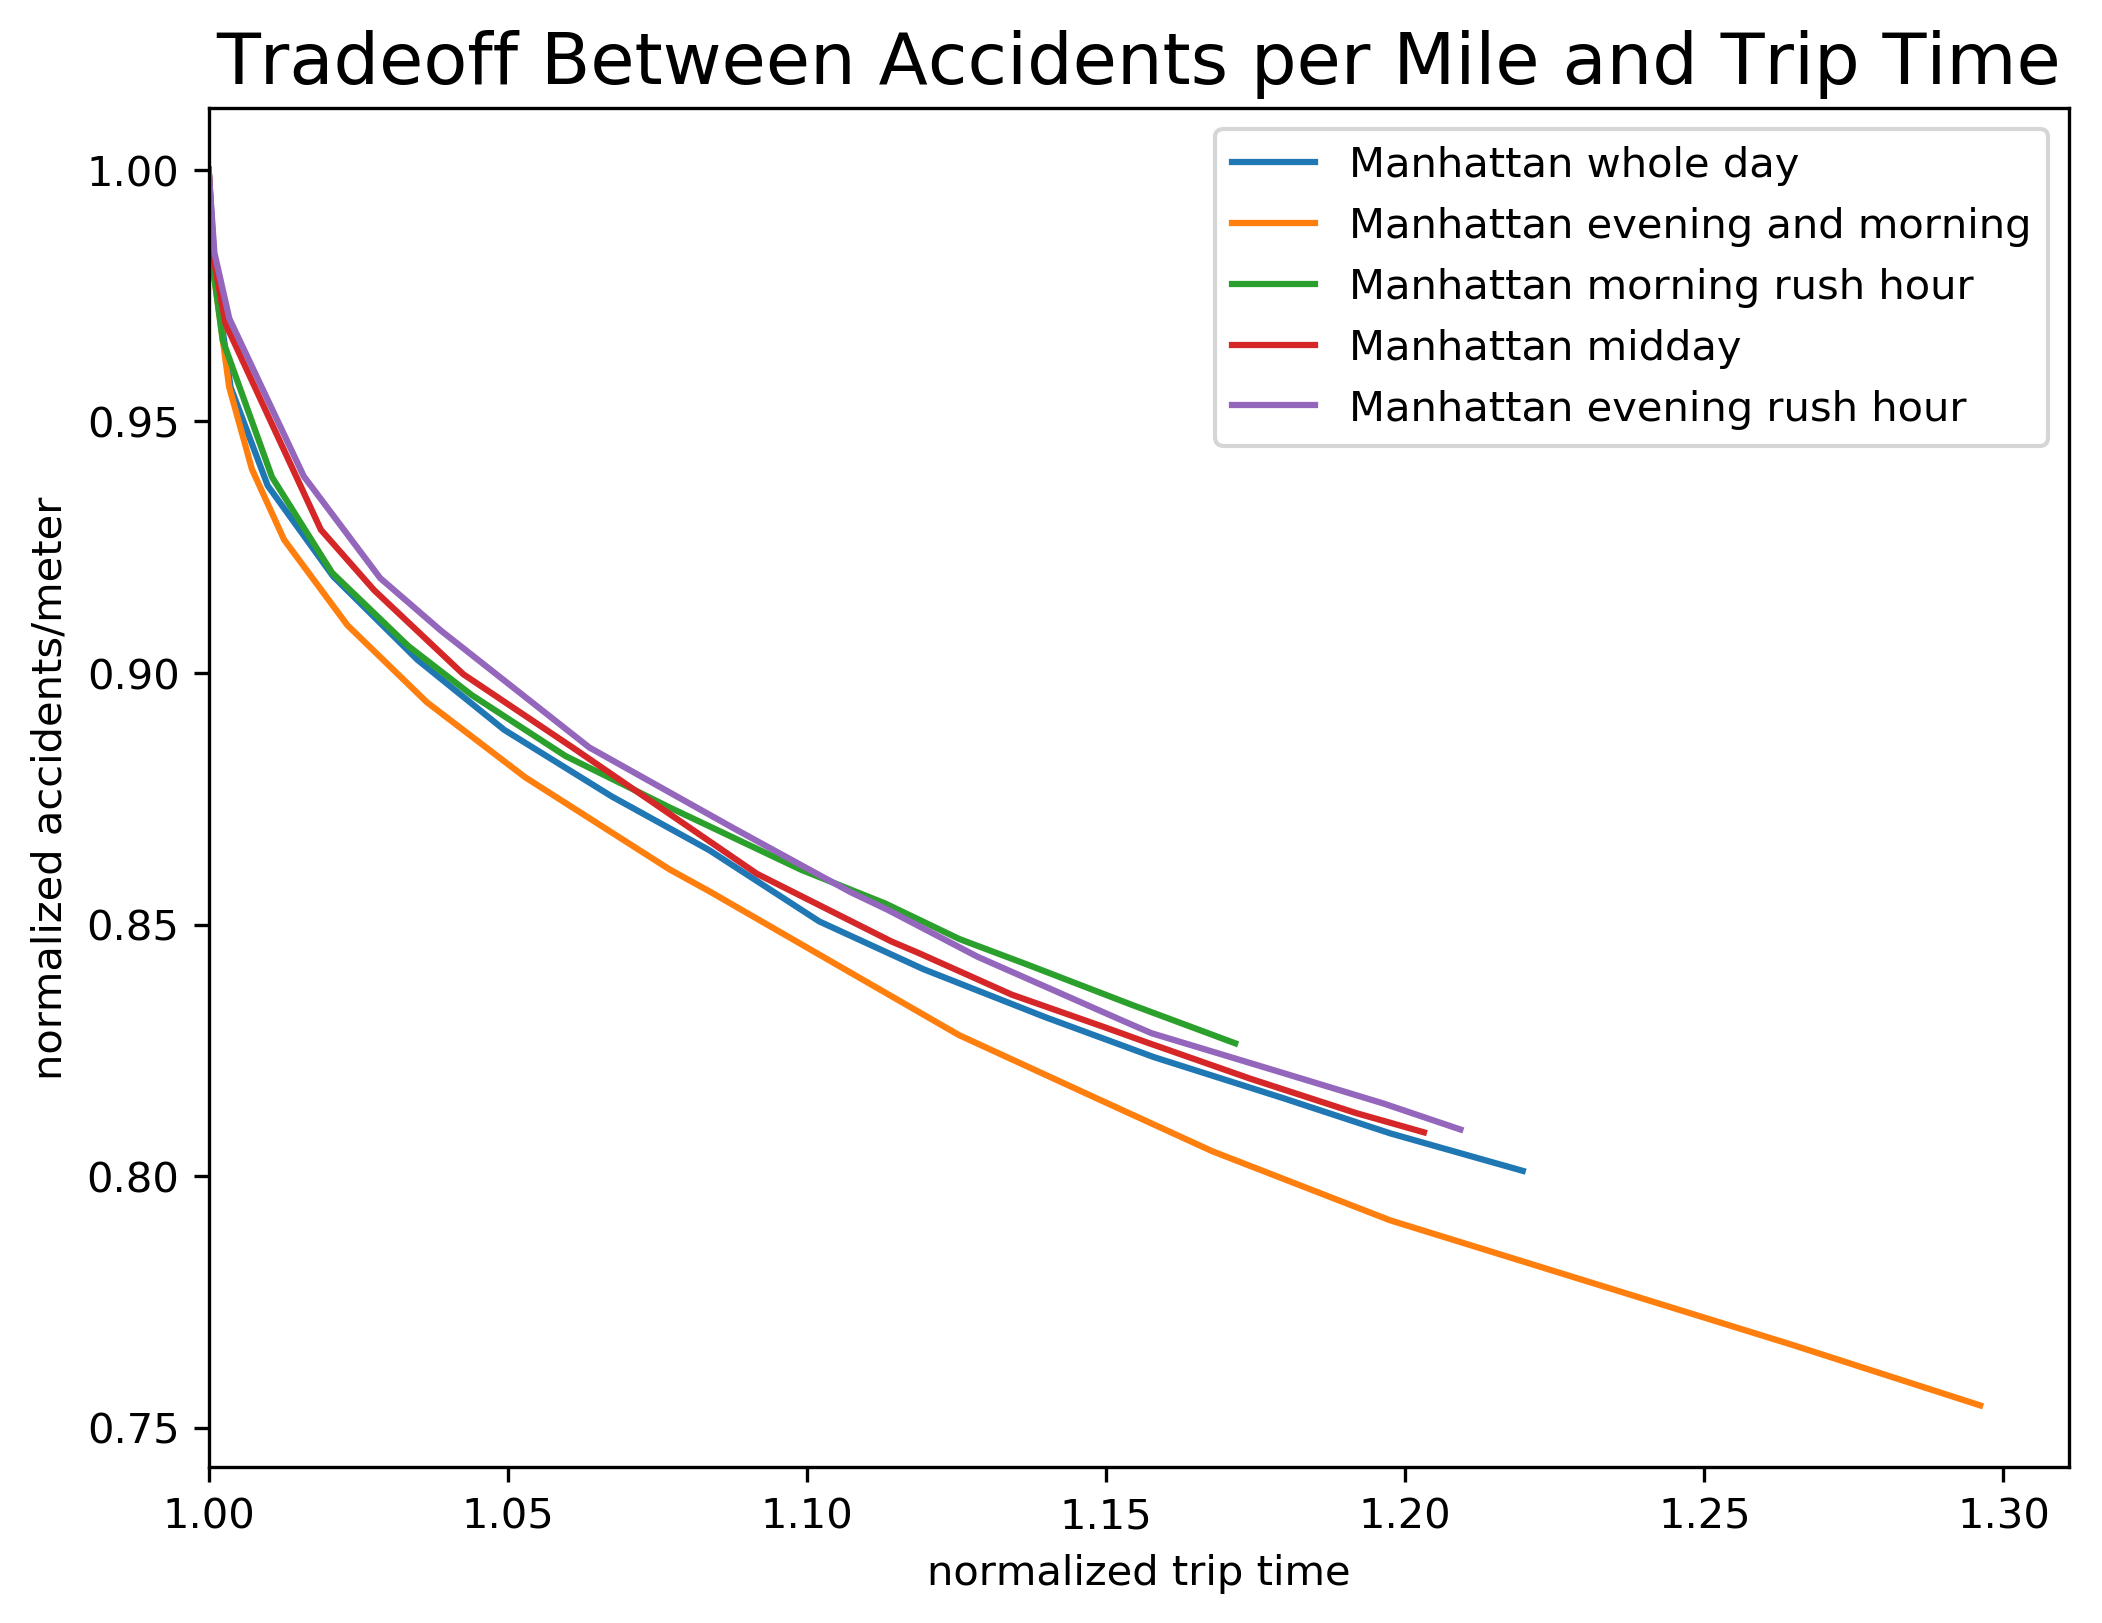

In [16]:
def get_offset(ind):
    if ind==0:
        return (70,-5)
    if ind==1:
        return (70,-11)
    if ind==2:
        return (70,-19)
    if ind==3:
        return (70,-10)
    if ind==4:
        return (70,-15)
    if ind==5:
        return (70,-20)
    if ind==6:
        return (100,-20)
    if ind==7:
        return (-10,-40)
    if ind==8:
        return (40,40)
    if ind==9:
        return (0,40)
    if ind==10:
        return (0,40)

plotter.figure(figsize=(8,6),dpi=300)
labels = ['alpha 0.{0}'.format(i) for i in range(0,10)]
lines=[]
for ind,(windowname,tradeoff) in enumerate(TradeoffDict.items()):
    points=tradeoff.curve()
    l, = plotter.plot(points["rel_time"],points["rel_APM"],label=windowname,zorder=1)
    #s1=plotter.scatter(points["rel_time"].iloc[3],points["rel_APM"].iloc[3],label=None,marker = 'v',zorder=4,color='black')
    #s2=plotter.scatter(points["rel_time"].iloc[6],points["rel_APM"].iloc[6],label=None,marker = 's',zorder=3,color='blue')
    #s3=plotter.scatter(points["rel_time"].iloc[10],points["rel_APM"].iloc[10],label=None,marker = 'o',zorder=5,color='red')
    #s4=plotter.scatter(points["rel_time"].iloc[15],points["rel_APM"].iloc[15],label=None,marker = 'D',zorder=2,color='green')
    #lines.append(l)
#plotter.scatter(points["rel_time"],points["rel_APM"])
#for ind,(alpha,row) in enumerate(points.iterrows()):
#        x,y = row
#        plotter.annotate(
#            '$\\alpha=${:.1f}'.format(alpha),
#            xy=(x, y), xytext=get_offset(ind),
#            textcoords='offset points', ha='right', va='bottom',
#            bbox=None,#dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
#            ,fontsize='large')
plotter.xlim(1,)
plotter.title("Tradeoff Between Accidents per Mile and Trip Time",fontsize='xx-large')
plotter.xlabel("normalized trip time",fontsize='medium')# ($\\bar\\tau_{\\alpha}$)",fontsize='medium')
plotter.ylabel("normalized accidents/meter",fontsize='medium')# ($\\bar\sigma_{\\alpha}$)",fontsize='medium')
#legend2=plotter.legend((s1,s2,s3,s4),('$\\alpha=0.82$','$\\alpha=0.94$','$\\alpha=0.98$','$\\alpha=1.0$'),loc=3)
plotter.legend()
#plotter.gca().add_artist(legend2)
plotter.savefig(curvefigfile,bbox_inches='tight')
plotter.show()
plotter.close()

In [11]:
points = points.sort_values(by='rel_time')

In [16]:
points

,rel_time,rel_APM
0.000000,1.000000,1.000000
0.452440,1.000186,0.994303
0.612664,1.000832,0.987313
0.820619,1.004241,0.973452
0.875026,1.008479,0.962545
0.914514,1.015106,0.951443
0.936448,1.021329,0.943673
0.956258,1.029335,0.936196
0.961825,1.034073,0.931654
0.967391,1.042576,0.923710


In [14]:
distList = [0.0] + [numpy.linalg.norm(points.iloc[i+1,:]-points.iloc[i,:]) for i in range(0,len(points)-1)]

In [15]:
distList

[0.0,
 0.005699542841129708,
 0.007019931143560648,
 0.014274304709135757,
 0.0117017287109378,
 0.012929317935029494,
 0.009954586110715404,
 0.010954841476005629,
 0.006563772766610505,
 0.01163639023672642,
 0.0035083596632641168,
 0.010029818475535409,
 0.007618712949702706,
 0.0074270373303772915,
 0.01101512103590619,
 0.005332745933632017,
 0.010552952865367523,
 0.013272781513683756,
 0.012629537667060096,
 0.0028269458412430804,
 0.010324760234819687,
 0.004517309785314458,
 0.01025216400466704,
 0.010653509689649593,
 0.011086511447955305,
 0.01261857079518452,
 0.004651610264631901,
 0.0036344330395714232,
 0.004104474394854511,
 8.083074823178809e-05,
 0.014661686488547496,
 0.0007264808813038791,
 0.004854677641985142,
 0.00027539192574027306,
 0.012711007608357309,
 0.0093616205567428,
 0.0,
 0.0,
 0.00031766249479490684,
 0.00457449297884466,
 0.0]

In [17]:
cursum = 0
runningSums = []
for dist in distList:
	cursum += dist
	runningSums.append(cursum)

totalLength = runningSums[-1]

In [23]:
(runningSums[2])/runningSums[-1]

0.04321124836608395

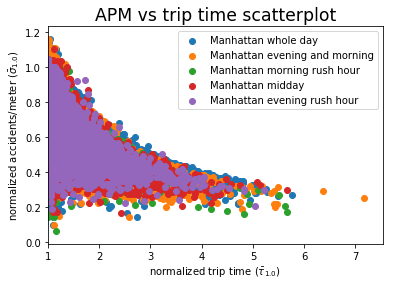

In [10]:
plotter.figure()
for windowname,tradeoff in TradeoffDict.items():
    scatterPoints=tradeoff.avoidancePoints()
    xvals=scatterPoints["trip_time"]
    yvals=scatterPoints["trip_APM"]
    plotter.scatter(xvals,yvals,label=windowname)
plotter.xlim(1,)
plotter.title("APM vs trip time scatterplot",fontsize='xx-large')
plotter.xlabel("normalized trip time ($\\bar\\tau_{1.0}$)",fontsize='medium')
plotter.ylabel("normalized accidents/meter ($\\bar\sigma_{1.0}$)",fontsize='medium')
plotter.legend()
#plotter.savefig(scatterfigfile,bbox_inches='tight')
plotter.show()
plotter.close()

In [ ]:
scatterPoints.head()
anomPoints = scatterPoints[scatterPoints['trip_APM'] > 1]

In [ ]:
import folium
import folium.plugins
import osmnx
import networkx

In [ ]:
Manhattan_center=(40.766045,-73.977784)
#tiles="OpenStreetMap"
#tiles="CartoDBpositron"
#tiles="CartoDBdark_matter"
#tiles="StamenWatercolor"
#tiles="StamenToner"
tiles="StamenTerrain"

In [ ]:
### for folium ###
def getPoint(node):
    try:
        temp=G.node[node]
        (lat,lng)=(temp["y"],temp["x"])
        return (lat,lng)
    except Exception:
        return None

In [ ]:
osmnx.config(log_file=True, log_console=True, use_cache=True)
G_raw = osmnx.graph_from_place('Manhattan Island, New York, USA', network_type='drive')

In [ ]:
G=G_raw.copy()

In [ ]:
fname="origins_mid"
my_map = folium.Map(Manhattan_center,
                  zoom_start=12,
                  tiles=tiles)
for o,d in anomPoints.index:
    olat,olon = getPoint(o)
    dlat,dlon = getPoint(d)
    folium.CircleMarker((olat,olon),radius=10,color='blue').add_to(my_map)
    folium.CircleMarker((dlat,dlon),radius=10,color='red').add_to(my_map)
my_map